# Loading the data

data is from https://www.federalreserve.gov/econres/feds/the-us-treasury-yield-curve-1961-to-the-present.htm

## Loading full dataset

In [2]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
import pandas as pd 
from pandas import Series, DataFrame 
from matplotlib import pyplot as plt
import numpy as np

SavePlots = False

In [3]:
import pandas as pd

# Skip the first 9 rows
data = pd.read_csv('../Final-Project-AppML/feds200628.csv', skiprows=9)

# Show the first 5 rows of the resulting dataframe
data.head(5)


,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
0,1961-06-14,3.917606,-1.277955,-1.949397,0.0,3.8067,3.9562,NaN,3.5492,3.8825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339218,-999.99
1,1961-06-15,3.978498,-1.257404,-2.247617,0.0,3.8694,4.0183,NaN,3.5997,3.9460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325775,-999.99
2,1961-06-16,3.984350,-1.429538,-1.885024,0.0,3.8634,4.0242,NaN,3.5957,3.9448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.348817,-999.99
3,1961-06-19,4.004379,-0.723311,-3.310743,0.0,3.9196,4.0447,NaN,3.6447,3.9842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282087,-999.99
4,1961-06-20,3.985789,-0.900432,-2.844809,0.0,3.8732,4.0257,NaN,3.5845,3.9552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310316,-999.99


## Removing non-essential rows and columns

In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter rows where Date is on or after 1985-01-02
data1 = data[data['Date'] >= '1985-01-02']

# Optional: check the result
data1.head()


,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
6145,1985-01-02,11.833172,-4.078431,-617.564405,620.832652,11.1608,12.5602,12.3404,10.1920,11.3976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.183248,2.183435
6146,1985-01-03,11.967238,-4.169920,-617.777654,620.619446,11.1536,12.4338,12.3620,10.2197,11.3545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.181257,2.179797
6147,1985-01-04,12.049434,-4.354115,-617.725058,620.671900,11.2057,12.4703,12.4150,10.2513,11.4123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.173992,2.171873
6148,1985-01-07,11.960591,-4.299825,-617.803915,620.593354,11.1201,12.2761,12.2690,10.1968,11.3032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.159062,2.156195
6149,1985-01-08,11.861243,-4.192519,-617.794508,620.602735,11.0820,12.2177,12.1834,10.1686,11.2611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.142931,2.140394


In [5]:
# List of columns to keep always
cols_to_keep = ['Date', 'BETA0', 'BETA1', 'BETA2']

# Select columns that start with 'SVENY'
sveny_cols = [col for col in data.columns if col.startswith('SVENY')]

# Combine all columns to keep
all_keep_cols = cols_to_keep + sveny_cols

# Filter the dataframe to keep only these columns
data2 = data1[all_keep_cols]

# Check the result
data2.head()

# Drop SVENY21 to SVENY30 from data2
columns_to_drop = [f'SVENY{i}' for i in range(21, 31)]
data2 = data2.drop(columns=columns_to_drop, errors='ignore')


In [6]:
data2.shape

(10528, 24)

In [7]:
data2.head()

,Date,BETA0,BETA1,BETA2,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,...,SVENY11,SVENY12,SVENY13,SVENY14,SVENY15,SVENY16,SVENY17,SVENY18,SVENY19,SVENY20
6145,1985-01-02,11.833172,-4.078431,-617.564405,9.1095,9.9891,10.5626,10.9389,11.1875,11.3533,...,11.6606,11.6812,11.6969,11.7093,11.7193,11.7275,11.7344,11.7404,11.7456,11.7501
6146,1985-01-03,11.967238,-4.169920,-617.777654,9.1550,10.0081,10.5511,10.9024,11.1345,11.2918,...,11.6216,11.6510,11.6756,11.6964,11.7144,11.7301,11.7440,11.7563,11.7673,11.7772
6147,1985-01-04,12.049434,-4.354115,-617.725058,9.1338,10.0223,10.5789,10.9343,11.1668,11.3238,...,11.6588,11.6903,11.7170,11.7399,11.7599,11.7775,11.7932,11.8071,11.8197,11.8310
6148,1985-01-07,11.960591,-4.299825,-617.803915,9.0956,9.9625,10.4947,10.8292,11.0462,11.1927,...,11.5188,11.5522,11.5811,11.6063,11.6285,11.6483,11.6659,11.6818,11.6961,11.7091
6149,1985-01-08,11.861243,-4.192519,-617.794508,9.0827,9.9379,10.4631,10.7929,11.0062,11.1493,...,11.4608,11.4917,11.5183,11.5413,11.5616,11.5795,11.5956,11.6099,11.6229,11.6346


# Data overview

## Plotting variables 

In [8]:
plot_data =data2

# Rename SVENY columns by stripping the prefix
plot_data.rename(columns=lambda col: col[5:] if col.startswith('SVENY') else col, inplace=True)

# Optional: convert new column names from strings like '01' to integers
plot_data.rename(columns=lambda col: str(int(col)) if col.isdigit() else col, inplace=True)

# Check the new column names
print(plot_data.columns)



Index(['Date', 'BETA0', 'BETA1', 'BETA2', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20'],
      dtype='object')


In [9]:
import matplotlib.pyplot as plt

# Histogram plotting function, you can adjust the bins

def plot_histogram(column_name, bins=30):
    if column_name not in plot_data.columns:
        print(f"Column '{column_name}' not found in data.")
        return

    plt.figure(figsize=(6, 4))
    plt.hist(plot_data[column_name].dropna(), bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


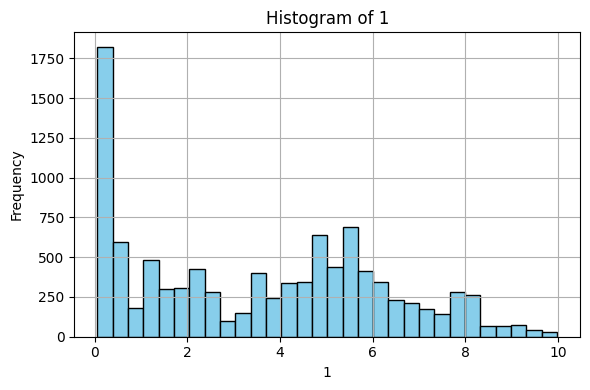

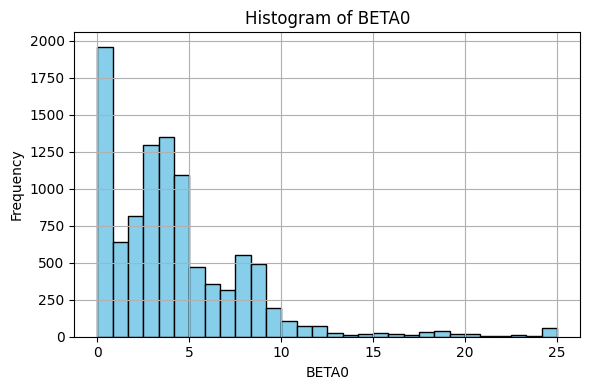

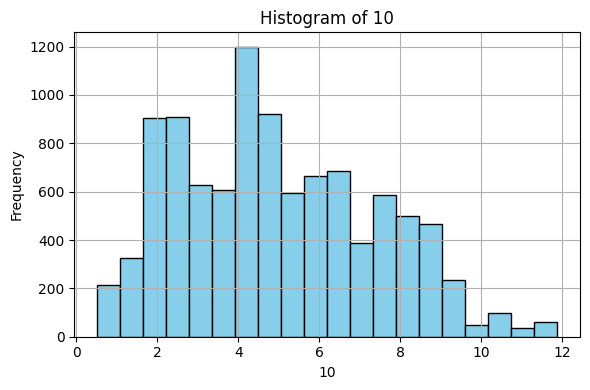

In [10]:
plot_histogram('1')         # Histogram for maturity 1
plot_histogram('BETA0')     # Histogram for BETA0
plot_histogram('10', bins=20)  # Histogram for maturity 10 with 20 bins

## Plotting yield curve for one maturity

In [11]:
plot_data.head(5)

,Date,BETA0,BETA1,BETA2,1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,19,20
6145,1985-01-02,11.833172,-4.078431,-617.564405,9.1095,9.9891,10.5626,10.9389,11.1875,11.3533,...,11.6606,11.6812,11.6969,11.7093,11.7193,11.7275,11.7344,11.7404,11.7456,11.7501
6146,1985-01-03,11.967238,-4.169920,-617.777654,9.1550,10.0081,10.5511,10.9024,11.1345,11.2918,...,11.6216,11.6510,11.6756,11.6964,11.7144,11.7301,11.7440,11.7563,11.7673,11.7772
6147,1985-01-04,12.049434,-4.354115,-617.725058,9.1338,10.0223,10.5789,10.9343,11.1668,11.3238,...,11.6588,11.6903,11.7170,11.7399,11.7599,11.7775,11.7932,11.8071,11.8197,11.8310
6148,1985-01-07,11.960591,-4.299825,-617.803915,9.0956,9.9625,10.4947,10.8292,11.0462,11.1927,...,11.5188,11.5522,11.5811,11.6063,11.6285,11.6483,11.6659,11.6818,11.6961,11.7091
6149,1985-01-08,11.861243,-4.192519,-617.794508,9.0827,9.9379,10.4631,10.7929,11.0062,11.1493,...,11.4608,11.4917,11.5183,11.5413,11.5616,11.5795,11.5956,11.6099,11.6229,11.6346


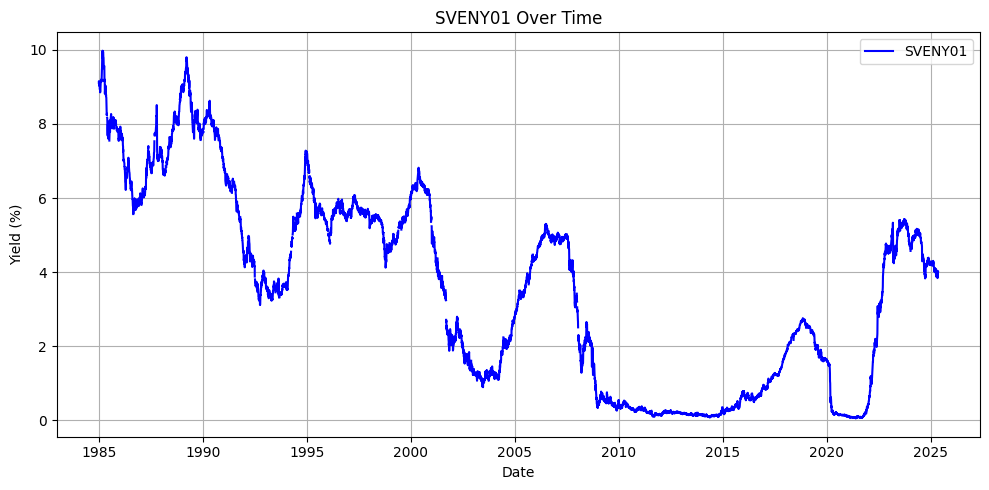

In [35]:
# Plot column '1' against Date
plt.figure(figsize=(10, 5))
plt.plot(plot_data['Date'], plot_data['1'], label='SVENY01', color='blue')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.title('SVENY01 Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## 3d plot of yield curve

In [42]:
print(Y_mesh)

[[ 1  2  3 ... 18 19 20]
 [ 1  2  3 ... 18 19 20]
 [ 1  2  3 ... 18 19 20]
 ...
 [ 1  2  3 ... 18 19 20]
 [ 1  2  3 ... 18 19 20]
 [ 1  2  3 ... 18 19 20]]


/var/folders/yn/lvxby3lj7nd2v75kj5sp86740000gn/T/ipykernel_23006/1168500486.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/var/folders/yn/lvxby3lj7nd2v75kj5sp86740000gn/T/ipykernel_23006/1168500486.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/opt/anaconda3/envs/appml25/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


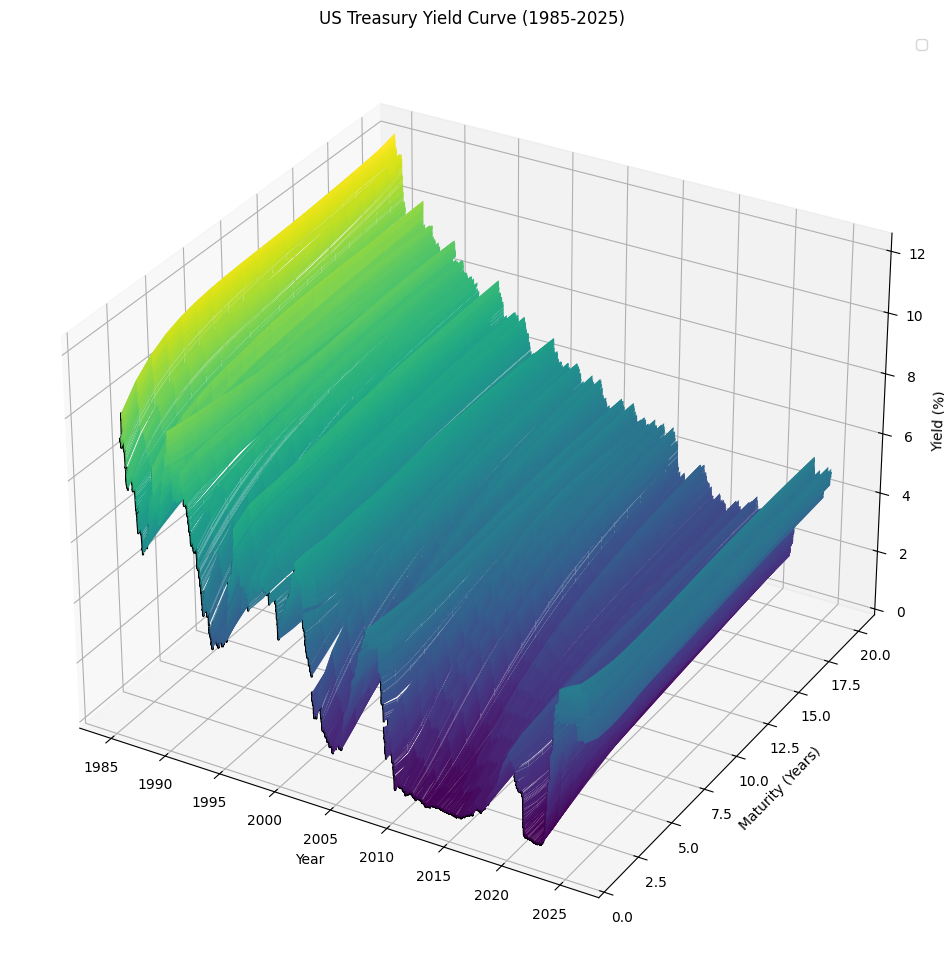

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd


maturity_cols = sorted([col for col in plot_data.columns if col.isdigit()], key=lambda x: int(x))
maturities = np.array([int(m) for m in maturity_cols])
dates = pd.to_datetime(plot_data['Date'])
X = dates.map(pd.Timestamp.toordinal).values
Y = maturities
Z = plot_data[maturity_cols].values


X_mesh, Y_mesh = np.meshgrid(X, Y, indexing='ij')


fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(X_mesh, Y_mesh, Z, cmap='viridis', rstride=1, cstride=1)

shortest_idx = 0
ax.plot(
    X,
    np.full_like(X, Y[shortest_idx]),
    Z[:, shortest_idx],
    color='black',
    linewidth=1.5
)

ax.set_xlabel('Year')
ax.set_ylabel('Maturity (Years)')
ax.set_zlabel('Yield (%)')
ax.set_title('US Treasury Yield Curve (1985-2025)')


tick_years = list(range(dates.dt.year.min(), dates.dt.year.max() + 1, 5))
tick_ordinals = [pd.Timestamp(f"{y}-01-01").toordinal() for y in tick_years]
ax.set_xticks(tick_ordinals)
ax.set_xticklabels([str(y) for y in tick_years])

ax.legend()
plt.tight_layout()
plt.show()


## Preliminary attempt at encoding

Note: Removing all NaN's and including beta's in the encoder

I.e.: this is only to compare and detect weaknessses in the model preliminary to actual fitting

In [38]:
# first guess coder
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Prepare your data
data_clean = data2.dropna().drop(columns=["Date"])  # Drop NaNs and Date
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clean)

# Step 2: Define autoencoder architecture
input_dim = X_scaled.shape[1]

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)  # Bottleneck

# Decoder
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Step 3: Train the autoencoder
history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - loss: 0.6764 - val_loss: 0.0897
Epoch 2/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.1344 - val_loss: 0.0799
Epoch 3/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 0.0807 - val_loss: 0.0766
Epoch 4/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 0.0801 - val_loss: 0.0747
Epoch 5/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 0.0668 - val_loss: 0.0714
Epoch 6/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.0390 - val_loss: 0.0671
Epoch 7/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.0984 - val_loss: 0.0663
Epoch 8/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 0.0706 - val_loss: 0.0636
Epoch 9/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 0.0739 - val_loss: 0.0633
Epoch 10/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 0.0531 - val_loss: 0.0665
Epoch 11/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 0.0443 - val_loss: 0.0637
Epoch 12/50
284/284 ━━━━━━━━━━

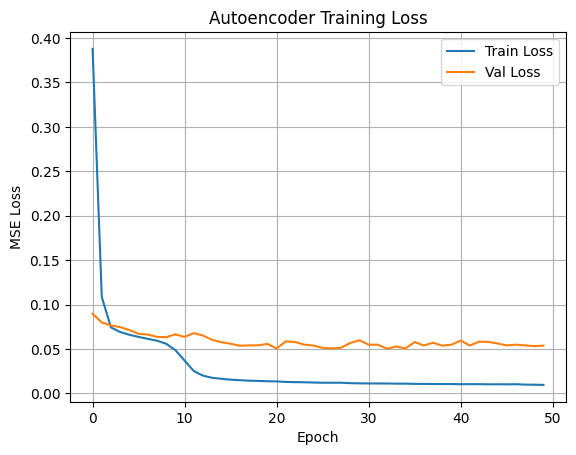

In [39]:
#Visualizing training loss
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Autoencoder Training Loss")
plt.legend()
plt.grid(True)
plt.show()


In [40]:
# Attempt to reconstruct

X_reconstructed = autoencoder.predict(X_scaled)

# Compute reconstruction error
reconstruction_error = np.mean((X_scaled - X_reconstructed)**2, axis=1)

# Optional: Flag high-error rows as anomalies
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold


315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Inverse transform to original scale
X_reconstructed_original = scaler.inverse_transform(X_reconstructed)

# Step 2: Recreate DataFrame from reconstruction
# Use the same columns that were input to the autoencoder
reconstructed_df = pd.DataFrame(X_reconstructed_original, columns=X.columns)

# Step 3: Extract maturity columns (assumes SVENY01 to SVENY30)
maturity_cols = [col for col in reconstructed_df.columns if col.startswith("SVENY")]
maturity_cols_sorted = sorted(maturity_cols, key=lambda x: int(x.replace("SVENY", "")))

# Step 4: Create meshgrid for plotting
X_time = np.arange(len(reconstructed_df))  # Use row index as time
Y_maturities = np.array([int(col.replace("SVENY", "")) for col in maturity_cols_sorted])
Z_yields = reconstructed_df[maturity_cols_sorted].values

X_mesh, Y_mesh = np.meshgrid(X_time, Y_maturities, indexing='ij')

# Step 5: Plot 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X_mesh, Y_mesh, Z_yields, cmap='viridis')

ax.set_xlabel('Time Index')
ax.set_ylabel('Maturity')
ax.set_zlabel('Reconstructed Yield')
ax.set_title('Reconstructed Yield Curve Surface')

plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# Betas

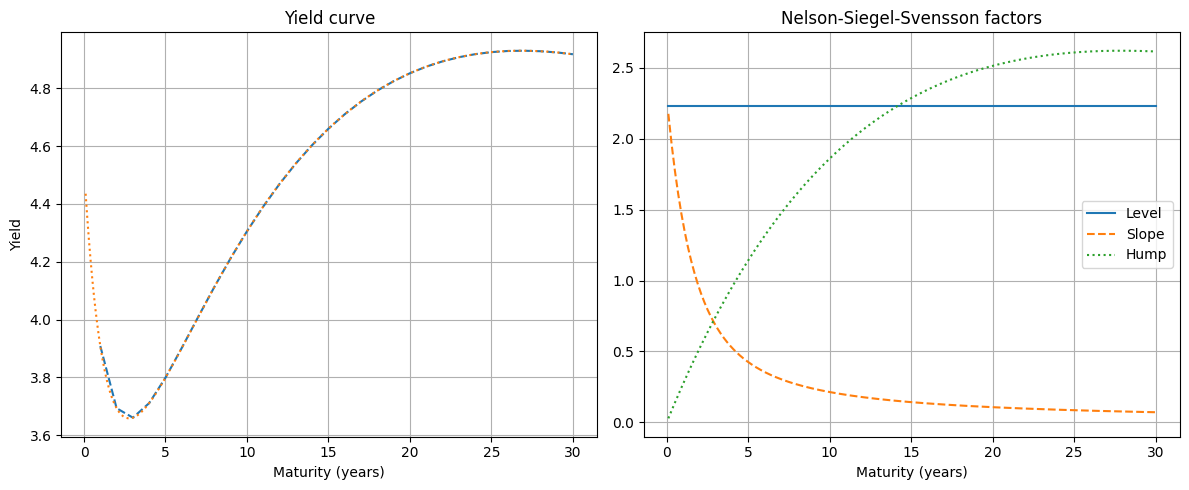

In [62]:
import numpy as np
import matplotlib.pyplot as plt


row = data1.loc[16666]

maturities = np.arange(1, 31)


yields = row[sveny_cols].values 

beta0 = row['BETA0']
beta1 = row['BETA1']
beta2 = row['BETA2']
beta3 = row['BETA3']
tau1 = 0.930333
tau2 = 15.562048

def nss_decompose(tau):
    term1 = (1 - np.exp(-tau / tau1)) / (tau / tau1)
    term2 = term1 - np.exp(-tau / tau1)
    term3 = (1 - np.exp(-tau / tau2)) / (tau / tau2) - np.exp(-tau / tau2)
    level = beta0 * np.ones_like(tau)
    slope = beta1 * term1
    hump = beta2 * term2 + beta3 * term3
    return level, slope, hump

tau = np.linspace(0.1, 30, 300)
level, slope, hump = nss_decompose(tau)
nss_curve = level + slope + hump


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(maturities, yields, linestyle='--')
plt.plot(tau, nss_curve, label='NSS fit', linestyle=':')
plt.title('Yield curve')
plt.xlabel('Maturity (years)')
plt.ylabel('Yield')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(tau, level, label='Level', linestyle='-')
plt.plot(tau, slope, label='Slope', linestyle='--')
plt.plot(tau, hump, label='Hump', linestyle=':')
plt.title('Nelson-Siegel-Svensson factors')
plt.xlabel('Maturity (years)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# PCA constructing Betas

## How many components

In [ ]:
data_pca = data2.drop(columns=['BETA0', 'BETA1', 'BETA2', 'BETA3'], errors='ignore')

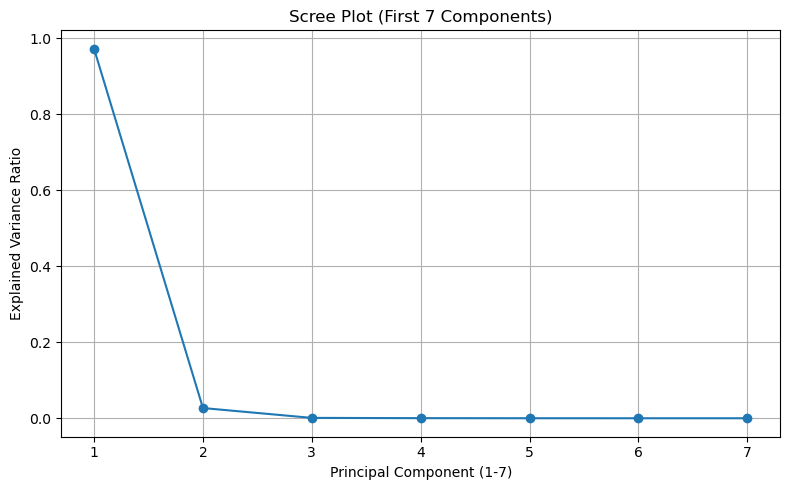

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 1. Select only numeric columns and drop NaNs
X = data_pca.select_dtypes(include=[np.number]).dropna()

# 2. Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# 3. Fit PCA and limit to 7 components
pca = PCA(n_components=7)
pca.fit(X_scaled)

# 4. Explained variance for first 7 components
explained_variance = pca.explained_variance_ratio_

# 5. Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), explained_variance, marker='o', linestyle='-')
plt.xlabel('Principal Component (1-7)')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (First 7 Components)')
plt.grid(True)
plt.tight_layout()
plt.show()



## PCA with 3 components

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Select numeric columns and drop NaNs
X = data_pca.select_dtypes(include='number').dropna()

# 2. Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# 3. Fit PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 4. (Optional) Inspect shape and explained variance
print("Shape of PCA output:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Shape of PCA output: (10073, 3)
Explained variance ratio: [9.71920142e-01 2.68402073e-02 9.48003073e-04]


In [ ]:
# Each row corresponds to a principal component
# Each column corresponds to the original feature
print("PCA Components (loadings):")
print(pca.components_)


PCA Components (loadings):
[[ 0.20781566  0.21520252  0.21987041  0.22287819  0.22477554  0.22589578
   0.22647056  0.22667124  0.22662611  0.22642988  0.22615046  0.22583459
   0.22551269  0.22520293  0.22491455  0.22465046  0.22440924  0.22418668
   0.22397691  0.22377313]
 [ 0.53457947  0.42962807  0.333493    0.24833791  0.17359171  0.10853609
   0.0524047   0.00436546 -0.0364496  -0.07090949 -0.09984518 -0.12402723
  -0.14415052 -0.16083108 -0.17460565 -0.18593744 -0.19522326 -0.20279966
  -0.20895121 -0.21391796]
 [ 0.58122441  0.16220575 -0.08340882 -0.21934016 -0.28284171 -0.29778643
  -0.28070279 -0.24339655 -0.1943536  -0.13962499 -0.0834631  -0.02879025
   0.02244109  0.06900294  0.11017061  0.14559121  0.17516399  0.19897046
   0.21720987  0.23015998]]


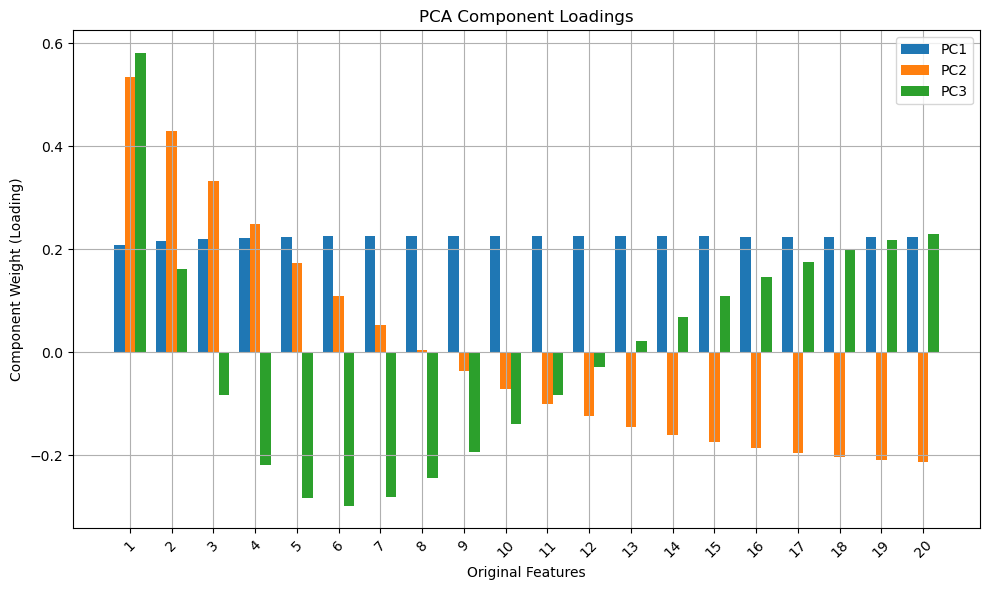

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names
feature_names = data_pca.select_dtypes(include='number').columns

# Create a DataFrame of the PCA components
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3'])

# Plot each component's loadings
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.bar(np.arange(len(feature_names)) + i*0.25, components_df.iloc[i], width=0.25, label=f'PC{i+1}')

# Formatting
plt.xticks(np.arange(len(feature_names)) + 0.25, feature_names, rotation=45)
plt.xlabel('Original Features')
plt.ylabel('Component Weight (Loading)')
plt.title('PCA Component Loadings')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


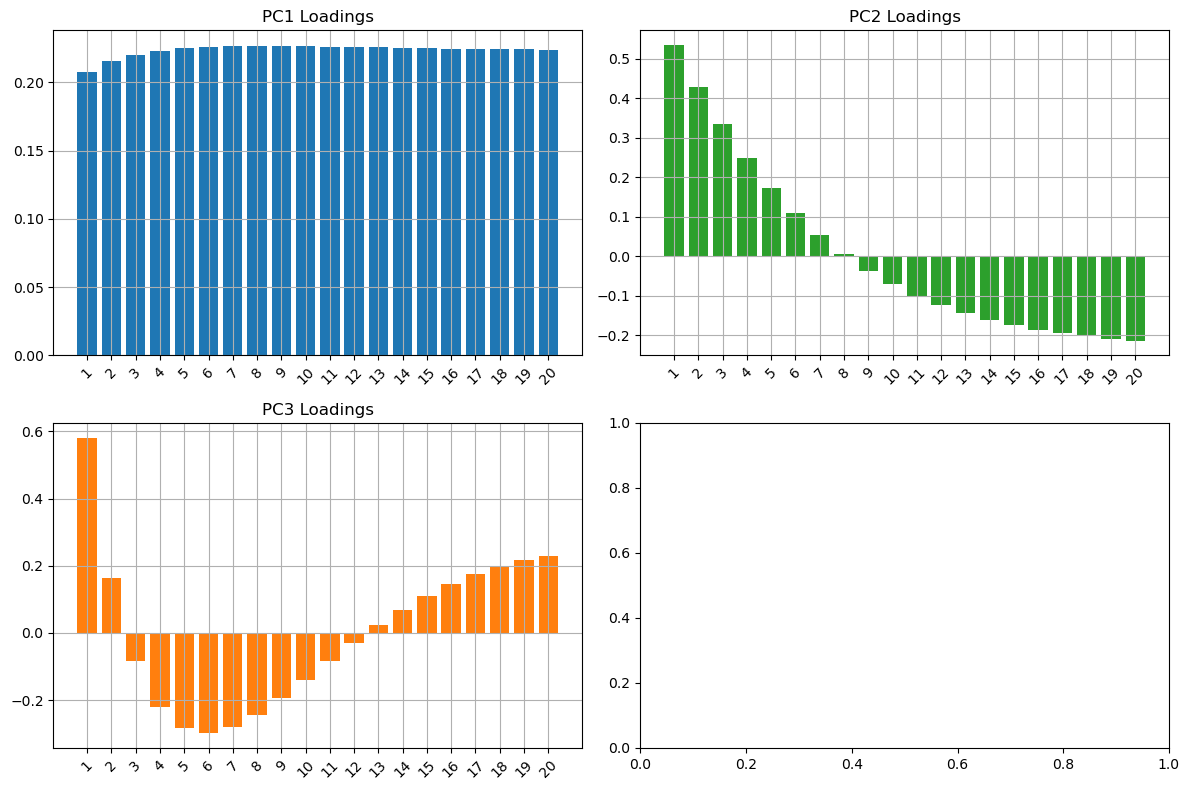

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature names and PCA components as a DataFrame
feature_names = data_pca.select_dtypes(include='number').columns
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3'])

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot PC1 (top left)
axs[0, 0].bar(feature_names, components_df.loc['PC1'], color='tab:blue')
axs[0, 0].set_title('PC1 Loadings')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# Plot PC2 (top right)
axs[0, 1].bar(feature_names, components_df.loc['PC2'], color='tab:green')
axs[0, 1].set_title('PC2 Loadings')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)

# Plot PC3 (bottom left)
axs[1, 0].bar(feature_names, components_df.loc['PC3'], color='tab:orange')
axs[1, 0].set_title('PC3 Loadings')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

## PCA with 4 components

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Select numeric columns and drop NaNs
X = data_pca.select_dtypes(include='number').dropna()

# 2. Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# 3. Fit PCA with 3 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# 4. (Optional) Inspect shape and explained variance
print("Shape of PCA output:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Shape of PCA output: (10073, 4)
Explained variance ratio: [9.71920142e-01 2.68402073e-02 9.48003073e-04 2.51365424e-04]


In [ ]:
# Each row corresponds to a principal component
# Each column corresponds to the original feature
print("PCA Components (loadings):")
print(pca.components_)


PCA Components (loadings):
[[ 0.20781566  0.21520252  0.21987041  0.22287819  0.22477554  0.22589578
   0.22647056  0.22667124  0.22662611  0.22642988  0.22615046  0.22583459
   0.22551269  0.22520293  0.22491455  0.22465046  0.22440924  0.22418668
   0.22397691  0.22377313]
 [ 0.53457947  0.42962807  0.333493    0.24833791  0.17359171  0.10853609
   0.0524047   0.00436546 -0.0364496  -0.07090949 -0.09984518 -0.12402723
  -0.14415052 -0.16083108 -0.17460565 -0.18593744 -0.19522326 -0.20279966
  -0.20895121 -0.21391796]
 [ 0.58122441  0.16220575 -0.08340882 -0.21934016 -0.28284171 -0.29778643
  -0.28070279 -0.24339655 -0.1943536  -0.13962499 -0.0834631  -0.02879025
   0.02244109  0.06900294  0.11017061  0.14559121  0.17516399  0.19897046
   0.21720987  0.23015998]
 [-0.33847372  0.09971218  0.26652469  0.2714737   0.19343685  0.08254604
  -0.03070241 -0.12877415 -0.20257298 -0.24838    -0.26580128 -0.25640695
  -0.22279283 -0.16803953 -0.09531669 -0.00768995  0.0920016   0.20119539
   0

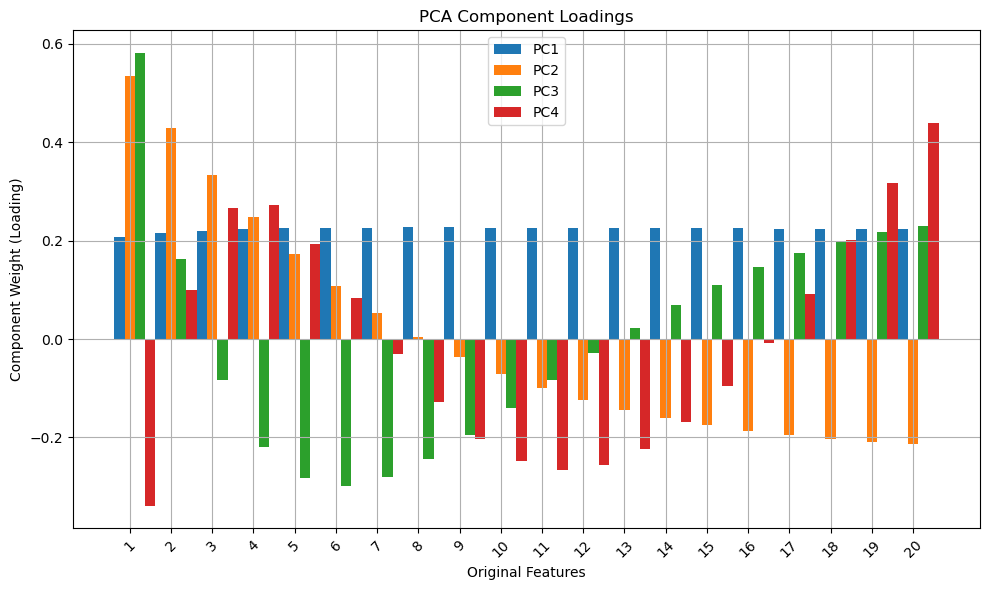

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names
feature_names = data_pca.select_dtypes(include='number').columns

# Create a DataFrame of the PCA components
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3', 'PC4'])

# Plot each component's loadings
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.bar(np.arange(len(feature_names)) + i*0.25, components_df.iloc[i], width=0.25, label=f'PC{i+1}')

# Formatting
plt.xticks(np.arange(len(feature_names)) + 0.25, feature_names, rotation=45)
plt.xlabel('Original Features')
plt.ylabel('Component Weight (Loading)')
plt.title('PCA Component Loadings')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


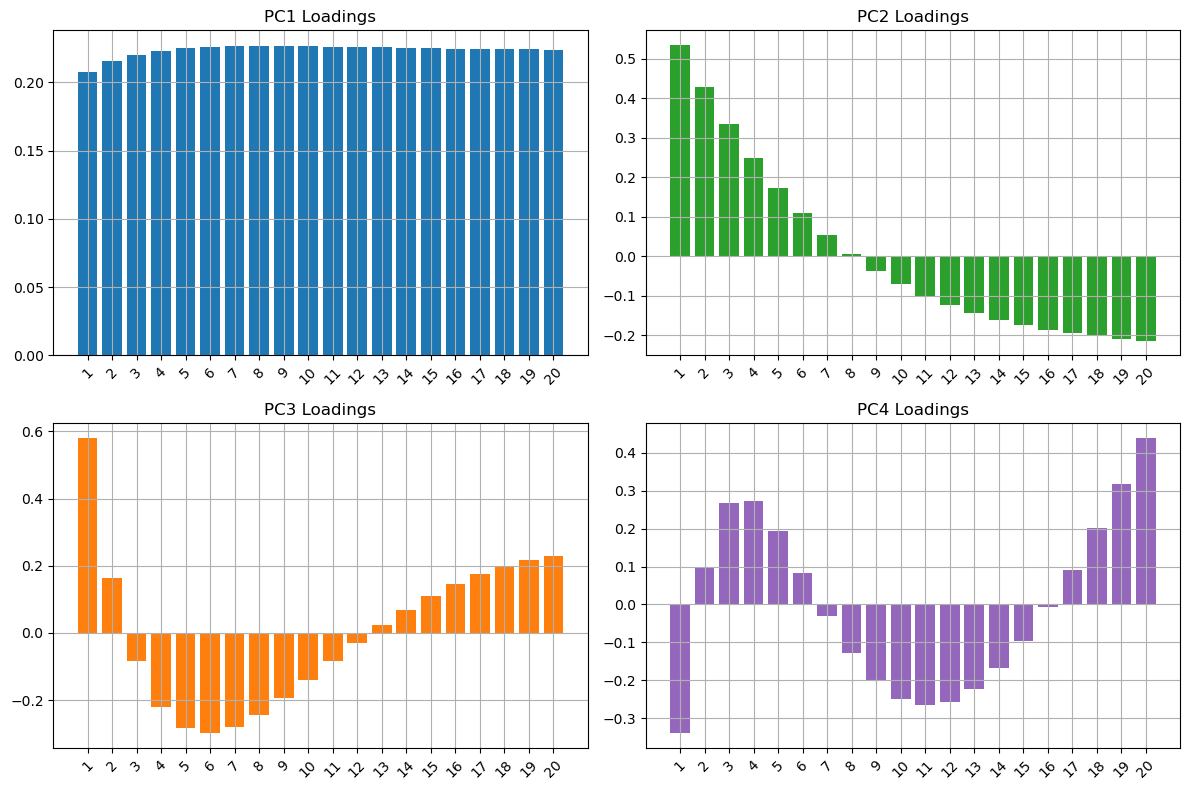

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature names and PCA components as a DataFrame
feature_names = data_pca.select_dtypes(include='number').columns
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3', 'PC4'])

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot PC1 (top left)
axs[0, 0].bar(feature_names, components_df.loc['PC1'], color='tab:blue')
axs[0, 0].set_title('PC1 Loadings')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# Plot PC2 (top right)
axs[0, 1].bar(feature_names, components_df.loc['PC2'], color='tab:green')
axs[0, 1].set_title('PC2 Loadings')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)

# Plot PC3 (bottom left)
axs[1, 0].bar(feature_names, components_df.loc['PC3'], color='tab:orange')
axs[1, 0].set_title('PC3 Loadings')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)

# Plot PC4 (bottom left)
axs[1, 1].bar(feature_names, components_df.loc['PC4'], color='tab:purple')
axs[1, 1].set_title('PC4 Loadings')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


# Additional data

In [ ]:
#OHLC data
import yfinance as yf
import mplfinance as mpf
import datetime

# Set ticker and date range
ticker = "^GSPC"
start_date = "1985-01-02"
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date, interval="1d")

# Save to CSV
data.to_csv("SP_historic.csv")

In [ ]:
import pandas as pd

# Load nodecision data
nodecision = pd.read_csv("FED_interest_rate_nodecision.csv")
nodecision["observation_date"] = pd.to_datetime(nodecision["observation_date"], format="%Y-%m-%d")
nodecision.rename(columns={"observation_date": "Date"}, inplace=True)

# Create full daily date range
date_range = pd.DataFrame({"Date": pd.date_range(start="1991-01-01", end=pd.Timestamp.today())})
nodecision_daily = pd.merge(date_range, nodecision, on="Date", how="left")

# Forward-fill interest rate values
nodecision_daily["FEDFUNDS"] = nodecision_daily["FEDFUNDS"].ffill()

# Load decision data
decision = pd.read_csv("FED_interest_rate_decision.csv")
decision.rename(columns={decision.columns[0]: "Date"}, inplace=True)

# ✅ Convert Date column in decision to datetime
decision["Date"] = pd.to_datetime(decision["Date"], format="%Y-%m-%d")

# Merge decision info onto daily data
combined = pd.merge(nodecision_daily, decision, on="Date", how="left")

# Save result
combined.to_csv("FED_interest.csv", index=False)
print(combined.head(50))


In [ ]:
# Example dataset with NA values
df = pd.read_csv('FED_interest.csv')

# Fill NA values with 0
df_filled = df.fillna(0)

# Write to CSV file
df_filled.to_csv("FED_interest.csv", index=False)


In [ ]:
import pandas as pd
data = pd.read_csv('../Final-Project-AppML/feds200628.csv', skiprows=9)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter rows where Date is on or after 1985-01-02
data1 = data[data['Date'] >= '1985-01-02']

# List of columns to keep always
cols_to_keep = ['Date', 'BETA0', 'BETA1', 'BETA2']

# Select columns that start with 'SVENY'
sveny_cols = [col for col in data.columns if col.startswith('SVENY')]

# Combine all columns to keep
all_keep_cols = cols_to_keep + sveny_cols

# Filter the dataframe to keep only these columns
data2 = data1[all_keep_cols]

# Drop SVENY21 to SVENY30 from data2
columns_to_drop = [f'SVENY{i}' for i in range(21, 31)]
data2 = data2.drop(columns=columns_to_drop, errors='ignore')

# Skip the first two rows, but manually set row 2 (i.e. 0-based row index 2) as header
SP_500_historic = pd.read_csv('../Final-Project-AppML/SP_historic.csv', skiprows=2, header=0)

# Now 'Date' should be in ISO format already, so you can parse it without specifying a format
SP_500_historic['Date'] = pd.to_datetime(SP_500_historic['Date'])

# If you want it as 'YYYY-MM-DD' string format
SP_500_historic['Date'] = SP_500_historic['Date'].dt.strftime('%Y-%m-%d')

# Preview
SP_500_historic.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Skip the first 9 rows
fed_interest = pd.read_csv('../Final-Project-AppML/FED_interest.csv')

# Ensure both Date columns are datetime
data2['Date'] = pd.to_datetime(data2['Date'])
SP_500_historic['Date'] = pd.to_datetime(SP_500_historic['Date'])
fed_interest['Date'] = pd.to_datetime(fed_interest['Date'])

# Now do the merge
data_w_SP = pd.merge(data2, SP_500_historic, on='Date', how='left')

data_w_SP = pd.merge(data_w_SP, fed_interest, on='Date', how='left')

# Ensure 'Date' is in datetime format
data_w_SP['Date'] = pd.to_datetime(data_w_SP['Date'])

# Filter by date
data_w_SP = data_w_SP[data_w_SP['Date'] >= '1991-01-09']

# Drop BETA columns and 'Target Rate (%)' column
data_w_SP = data_w_SP.loc[:, ~data_w_SP.columns.str.startswith('BETA')]
data_w_SP = data_w_SP.drop(columns='Target Rate (%)', errors='ignore')
#data_w_SP = data_w_SP.drop(columns='Notes', errors='ignore') # Forlæng
#data_w_SP = data_w_SP.drop(columns='Rate Change (bps)', errors='ignore') #Forlæng

# Convert 'Notes' and 'Rate Change (bps)' to integers, if they exist
for col in ['Notes', 'Rate Change (bps)']:
    if col in data_w_SP.columns:
        data_w_SP[col] = pd.to_numeric(data_w_SP[col], errors='coerce').astype('Int64')  # Nullable integer type


df = data_w_SP.dropna()

# Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df.columns.to_list)

In [ ]:
# Select features (exclude 'Date' and any non-numeric columns)
feature_cols = df.columns[(df.columns != 'Date') & (df.columns != 'Notes') ] #& (df.columns != 'Rate Change (bps)')

X = df[feature_cols]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


#Chooses 4 or 6 cluster

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
# Group by day and get dominant cluster for each date
df['DateOnly'] = df['Date'].dt.date
daily_clusters = df.groupby('DateOnly')['Cluster'].agg(lambda x: x.mode().iloc[0])


In [ ]:
# --------- Aggregate by Month and Get Dominant Cluster ---------
df['Month'] = df['Date'].dt.to_period('M')
monthly_clusters = df.groupby('Month')['Cluster'].agg(lambda x: x.mode().iloc[0])
monthly_clusters.index = monthly_clusters.index.to_timestamp()


# ---------  Plot ---------
plt.figure(figsize=(14, 4))
colors = sns.color_palette("hls", n_colors=n_clusters)
# Define a custom color list (as hex or RGB)
# colors = [
#     'coral', 
#     'cornflowerblue',
#     'royalblue',     
#     'lightblue',  
#     'salmon'
# ]


for i, (month, cluster) in enumerate(monthly_clusters.items()):
    plt.bar(i, 1, color=colors[cluster])  # No edgecolor

# Show only year ticks to reduce clutter
# years = [date.year for date in monthly_clusters.index]
# unique_years = sorted(set(years))
# year_ticks = [i for i, y in enumerate(years) if y in unique_years and (i == 0 or y != years[i - 1])]
# year_labels = [str(years[i]) for i in year_ticks]

#Show every fifth year
years = [date.year for date in monthly_clusters.index]
year_ticks = [i for i, y in enumerate(years) if y % 5 == 0 and (i == 0 or y != years[i - 1])]
year_labels = [str(years[i]) for i in year_ticks]


plt.xticks(ticks=year_ticks, labels=year_labels, rotation=0)
plt.xlabel('Year')
plt.ylabel('Dominant Cluster')
plt.title('Stove Data Clustering Over Time (Dominant Cluster per Month)')
plt.tight_layout()
plt.show()


### Comparing to theory

In [ ]:
# faster
# periods = [
#     ("1991-01-01", "2001-12-31", "IT boom, 90's"),
#     ("2002-01-01", "2007-12-31", "Housing bubble 00's"),
#     ("2008-01-01", "2009-12-31", "Financial crisis 2008"),
#     ("2010-01-01", "2020-02-29", "Long expansion 10's"),
#     ("2020-03-01", "2022-12-31", "COVID recovery"),
#     ("2023-01-01", "2025-06-01", "Recent slowdown after 2023"),
# ]
periods = [
    ("1991-01-01", "2001-12-31", 0),
    ("2002-01-01", "2007-12-31", 1),
    ("2008-01-01", "2009-12-31", 2),
    ("2010-01-01", "2020-02-29", 3),
    ("2020-03-01", "2022-12-31", 4),
    ("2023-01-01", "2025-06-01", 5),
]

# Create date boundaries and labels
boundaries = pd.to_datetime([
    "1991-01-01", "2002-01-01", "2008-01-01", "2010-01-01",
    "2020-03-01", "2023-01-01", "2025-06-02"
])

# labels = [
#     "IT boom", "Housing bubble", "Financial crisis",
#     "Long expansion", "COVID recovery", "Recent slowdown"
# ]
labels = [
    0,1,2,3,4,5
]

# Assign periods using cut
df_period = pd.DataFrame({'Date': pd.date_range("1991-01-01", "2025-06-01", freq='D')})
df_period['Period'] = pd.cut(df_period['Date'], bins=boundaries, labels=labels, right=False)


In [ ]:
df_confusion = df.merge(df_period, on='Date', how='left')

# Save result
df_confusion.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Extract true and predicted labels
y_true = df_confusion['Period'].astype(str)
y_pred = df_confusion['Cluster'].astype(str)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Custom label list (optional)
labels = sorted(df_confusion['Period'].unique())
labels_periods = [
    "IT boom", "Housing bubble", "Financial crisis",
    "Long expansion", "COVID recovery", "Recent slowdown"
]

# Plot with custom color map (e.g. Reds, Greens, Purples, etc.)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels_periods)

# Add labels
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Period')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels_periods)

# sns.heatmap(cm_normalized, annot=True, fmt='d', cmap='Blues',
#              xticklabels=labels, yticklabels=labels_periods,
#              linewidths=0.5, linecolor='gray')

### Finding: Bust graphs

In [ ]:
bust_df = df[df['Cluster'] == 1]
bust_df = bust_df.drop(columns=['DateOnly', 'Month', 'Cluster'])

In [ ]:
import matplotlib.pyplot as plt

# Column names
target_col = 'FEDFUNDS'
measurement_col = 'Close'

# Ensure datetime format and sort
bust_df['Date'] = pd.to_datetime(bust_df['Date'])
bust_df = bust_df.sort_values('Date').reset_index(drop=True)

# Create plot
fig, ax1 = plt.subplots(figsize=(14, 5))
ax2 = ax1.twinx()

# Use index positions for x-axis (not continuous dates)
x = range(len(bust_df))

# Plot solid lines
color1 = 'goldenrod'
color2 = 'royalblue'

ax1.plot(x, bust_df[target_col], color=color1, linewidth=2.5, label=target_col)
ax2.plot(x, bust_df[measurement_col], color=color2, linewidth=2.5, label=measurement_col)

# Label axes
ax1.set_ylabel('FED Interest Rate ', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax2.set_ylabel('S&P Closing Price', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax1.set_xlabel('Date')

# Format x-ticks with actual dates
step = max(len(bust_df) // 10, 1)  # Show ~10 date labels
tick_locs = list(range(0, len(bust_df), step))
tick_labels = bust_df['Date'].dt.strftime('%Y-%m-%d').iloc[tick_locs]

ax1.set_xticks(tick_locs)
ax1.set_xticklabels(tick_labels, rotation=45)

# Final plot
plt.title(f'FED interest rate and stock prices in a cluster')
plt.tight_layout()
plt.show()

# Predicting interest rate

### BDT t-1

In [ ]:
split_date = pd.Timestamp('2025-01-01')

train_data = df[df['Date'] < split_date]
test_data = df[df['Date'] >= split_date]

target = 'FEDFUNDS'

In [ ]:
train_data_day = train_data

# Create future-shifted target
train_data_day['target_t_plus_1'] = train_data_day[target].shift(-1)

In [ ]:
# Drop rows with NaNs introduced by shifting
train_data_day = train_data_day.dropna(subset=['target_t_plus_1'])

# Training/validation 80/20 split
test_split_date_week = pd.Timestamp('2018-01-01')

# Split into training and validation sets
train_df_day = train_data_day[train_data_day["Date"] < test_split_date]
val_df_day = train_data_day[train_data_day["Date"] >= test_split_date]

# Define features and target
feature_cols = [col for col in train_data_day.columns if col not in ["Date", target, 'target_t_plus_1']]
X_train_day = train_df_day[feature_cols]
y_train_day = train_df_day['target_t_plus_1']

X_val_day = val_df_day[feature_cols]
y_val_day = val_df_day['target_t_plus_1']


# Model input
# Create DMatrices for XGBoost
dtrain_day = xgb.DMatrix(X_train_day, label=y_train_day)
dvalid_day = xgb.DMatrix(X_val_day, label=y_val_day)

In [ ]:
# Drop rows with NaNs introduced by shifting
train_data_day = train_data_day.dropna(subset=['target_t_plus_1'])

# Training/validation 80/20 split
test_split_date_week = pd.Timestamp('2018-01-01')

# Split into training and validation sets
train_df_day = train_data_day[train_data_day["Date"] < test_split_date]
val_df_day = train_data_day[train_data_day["Date"] >= test_split_date]

# Define features and target
feature_cols = [col for col in train_data_day.columns if col not in ["Date", target, 'target_t_plus_1']]
X_train_day = train_df_day[feature_cols]
y_train_day = train_df_day['target_t_plus_1']

X_val_day = val_df_day[feature_cols]
y_val_day = val_df_day['target_t_plus_1']


# Model input
# Create DMatrices for XGBoost
dtrain_day = xgb.DMatrix(X_train_day, label=y_train_day)
dvalid_day = xgb.DMatrix(X_val_day, label=y_val_day)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import pandas as pd

# Start timer
start = time.time()

# XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain_day, 'train'), (dvalid_day, 'eval')]

# Train model with early stopping
xgb_model_day = xgb.train(
    params=params,
    dtrain=dtrain_day,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict and evaluate
y_pred_rate_day = xgb_model_day.predict(dvalid_day, iteration_range=(0, xgb_model_day.best_iteration + 1))
mae_day = mean_absolute_error(y_val_day, y_pred_rate_day)
relative_mae_day = mae_day / abs(y_val_day).mean()

print(f"Mean Absolute Error: {mae_day:.4f}")
print(f"Relative MAE: {relative_mae_day:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")
import matplotlib.pyplot as plt

# Assuming you still have test_data_clean (with dropped NAs) and predictions y_pred
# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(val_df['Date'], y_val, label='Actual', color = 'goldenrod') #, marker='o'
plt.plot(val_df['Date'], y_pred_rate, label='Predicted t-1', color = 'lightblue') # , marker='x'
#plt.plot(test_data_clean['Date'], y_pred_ZCB, label='Predicted w. ZCB data', marker='x')
#plt.plot(test_data_clean['Date'], y_pred_stock, label='Predicted w. stock data', marker='x')
plt.xlabel('Date')
plt.ylabel('Interest rate (%)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Variational Auto-Encoder

## Fitting model

In [46]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import numpy as np
import torch

seed = 42 
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


data_clean = data2.dropna().drop(columns=["Date"]).copy()
data_features = data_clean.drop(columns=['BETA0', 'BETA1', 'BETA2'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_features)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

input_dim = X_tensor.shape[1]
latent_dim = 2

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dims=[16,8], latent_dim=latent_dim):
        super(VAE, self).__init__()
        self.encoder_layers = nn.ModuleList()
        prev_dim = input_dim
        for h_dim in hidden_dims:
            self.encoder_layers.append(nn.Linear(prev_dim, h_dim))
            prev_dim = h_dim
        self.fc_mean = nn.Linear(prev_dim, latent_dim)
        self.fc_logvar = nn.Linear(prev_dim, latent_dim)

        self.decoder_layers = nn.ModuleList()
        hidden_dims.reverse()
        prev_dim = latent_dim
        for h_dim in hidden_dims:
            self.decoder_layers.append(nn.Linear(prev_dim, h_dim))
            prev_dim = h_dim
        self.output_layer = nn.Linear(prev_dim, input_dim)

        self.relu = nn.ReLU()

    def encode(self, x):
        for layer in self.encoder_layers:
            x = self.relu(layer(x))
        return self.fc_mean(x), self.fc_logvar(x)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        for layer in self.decoder_layers:
            z = self.relu(layer(z))
        return self.output_layer(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_hat = self.decode(z)
        return x_hat, mu, logvar

def loss_fn(x, x_hat, mu, logvar, beta=1):
    recon_loss = nn.functional.mse_loss(x_hat, x, reduction='sum')
    kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + beta * kl

batch_size = 32
dataset = TensorDataset(X_tensor)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_vae = VAE(input_dim=input_dim, latent_dim=latent_dim).to(device)
optimizer = torch.optim.Adam(model_vae.parameters(), lr=1e-3)

epochs = 100
for epoch in range(epochs):
    model_vae.train()
    total_loss = 0
    for batch in loader:
        x = batch[0].to(device)
        optimizer.zero_grad()
        x_hat, mu, logvar = model_vae(x)
        loss = loss_fn(x, x_hat, mu, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(loader.dataset):.4f}")

model_vae.eval()
with torch.no_grad():
    X_reconstructed = model_vae(X_tensor.to(device))[0].cpu().numpy()

X_reconstructed_original = scaler.inverse_transform(X_reconstructed)
reconstructed_df = pd.DataFrame(X_reconstructed_original, columns=data_features.columns)


Epoch 1, Loss: 10.4103
Epoch 2, Loss: 4.0199
Epoch 3, Loss: 3.5469
Epoch 4, Loss: 3.2333
Epoch 5, Loss: 3.0028
Epoch 6, Loss: 2.9096
Epoch 7, Loss: 2.9068
Epoch 8, Loss: 2.8884
Epoch 9, Loss: 2.8997
Epoch 10, Loss: 2.8736
Epoch 11, Loss: 2.8577
Epoch 12, Loss: 2.8554
Epoch 13, Loss: 2.8713
Epoch 14, Loss: 2.8714
Epoch 15, Loss: 2.8626
Epoch 16, Loss: 2.8514
Epoch 17, Loss: 2.8562
Epoch 18, Loss: 2.8339
Epoch 19, Loss: 2.8470
Epoch 20, Loss: 2.8415
Epoch 21, Loss: 2.8357
Epoch 22, Loss: 2.8343
Epoch 23, Loss: 2.8303
Epoch 24, Loss: 2.8216
Epoch 25, Loss: 2.8331
Epoch 26, Loss: 2.8310
Epoch 27, Loss: 2.8315
Epoch 28, Loss: 2.8233
Epoch 29, Loss: 2.8159
Epoch 30, Loss: 2.8312
Epoch 31, Loss: 2.8306
Epoch 32, Loss: 2.8120
Epoch 33, Loss: 2.8218
Epoch 34, Loss: 2.8289
Epoch 35, Loss: 2.8228
Epoch 36, Loss: 2.8189
Epoch 37, Loss: 2.8023
Epoch 38, Loss: 2.8033
Epoch 39, Loss: 2.8340
Epoch 40, Loss: 2.8107
Epoch 41, Loss: 2.8126
Epoch 42, Loss: 2.8126
Epoch 43, Loss: 2.8042
Epoch 44, Loss: 2.8

In [47]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(scaler.inverse_transform(X_tensor.numpy()), X_reconstructed_original)
print(f"Reconstruction MSE: {mse:.4f}")

Reconstruction MSE: 0.2915


### NN t-1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import time

# -----------------------------
# Normalize the features
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_day)
X_val_scaled = scaler.transform(X_val_day)

# -----------------------------
# Build the neural network
# -----------------------------
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

# -----------------------------
# Train the model
# -----------------------------
start = time.time()
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_day,
    validation_data=(X_val_scaled, y_val_day),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

print(f"Time used by Neural Network: {(time.time() - start) * 1000:.1f} ms")

# -----------------------------
# Predict and evaluate
# -----------------------------
y_pred_nn_day = model.predict(X_val_scaled).flatten()
mae_nn = mean_absolute_error(y_val_day, y_pred_nn_day)
relative_mae_nn = mae_nn / abs(y_val_day).mean()

print(f"Mean Absolute Error: {mae_nn:.4f}")
print(f"Relative MAE: {relative_mae_nn:.4f}")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(val_df_week['Date'], y_val_week, label='Actual', color = 'goldenrod')
plt.plot(val_df_week['Date'], y_pred_nn_day, label='Predicted NN', color = "cornflowerblue")
plt.plot(val_df_week['Date'], y_pred_rate_day, label='Predicted XGB', color = 'lightblue') # , marker='x'
#plt.plot(val_df['Date'], y_pred_rate, label='Predicted (XGB) t+1') #, marker='x'
plt.xlabel('Date')
plt.ylabel(target + ' (t+7)')
plt.title('ML models precitions')
plt.legend()
plt.grid(True)
plt.show()

### BDT t-7

In [ ]:
train_data_week = train_data

# Create future-shifted target: t+7
train_data_week['target_t_plus_7'] = train_data[target].shift(-7)

In [ ]:
# Drop rows with NaNs introduced by shifting
train_data_week = train_data_week.dropna(subset=['target_t_plus_7'])

# Training/validation 80/20 split
test_split_date_week = pd.Timestamp('2018-01-01')

# Split into training and validation sets
train_df_week = train_data_week[train_data_week["Date"] < test_split_date]
val_df_week = train_data_week[train_data_week["Date"] >= test_split_date]

# Define features and target
feature_cols = [col for col in train_data.columns if col not in ["Date", target, 'target_t_plus_7']]
X_train_week = train_df_week[feature_cols]
y_train_week = train_df_week['target_t_plus_7']

X_val_week = val_df_week[feature_cols]
y_val_week = val_df_week['target_t_plus_7']


# Model input
# Create DMatrices for XGBoost
dtrain_week = xgb.DMatrix(X_train_week, label=y_train_week)
dvalid_week = xgb.DMatrix(X_val_week, label=y_val_week)


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import pandas as pd

# Start timer
start = time.time()

# XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain_week, 'train'), (dvalid_week, 'eval')]

# Train model with early stopping
xgb_model_week = xgb.train(
    params=params,
    dtrain=dtrain_week,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict and evaluate
y_pred_rate_week = xgb_model_week.predict(dvalid_week, iteration_range=(0, xgb_model_week.best_iteration + 1))
mae_week = mean_absolute_error(y_val_week, y_pred_rate_week)
relative_mae_week = mae_week / abs(y_val_week).mean()



### BDT t-30

In [ ]:
train_data_month = train_data

# Create future-shifted target
train_data_month['target_t_plus_30'] = train_data_month[target].shift(-30)

In [ ]:
# Drop rows with NaNs introduced by shifting
train_data_month = train_data_month.dropna(subset=['target_t_plus_30'])

# Training/validation 80/20 split
test_split_date_week = pd.Timestamp('2018-01-01')

# Split into training and validation sets
train_df_month = train_data_month[train_data_month["Date"] < test_split_date]
val_df_month = train_data_month[train_data_month["Date"] >= test_split_date]

# Define features and target
feature_cols = [col for col in train_data_month.columns if col not in ["Date", target, 'target_t_plus_30']]
X_train_month = train_df_month[feature_cols]
y_train_month = train_df_month['target_t_plus_30']

X_val_month = val_df_month[feature_cols]
y_val_month = val_df_month['target_t_plus_30']


# Model input
# Create DMatrices for XGBoost
dtrain_month = xgb.DMatrix(X_train_month, label=y_train_month)
dvalid_month = xgb.DMatrix(X_val_month, label=y_val_month)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import pandas as pd

# Start timer
start = time.time()

# XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain_month, 'train'), (dvalid_month, 'eval')]

# Train model with early stopping
xgb_model_month = xgb.train(
    params=params,
    dtrain=dtrain_month,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict and evaluate
y_pred_rate_month = xgb_model_month.predict(dvalid_month, iteration_range=(0, xgb_model_month.best_iteration + 1))
mae_month = mean_absolute_error(y_val_month, y_pred_rate_month)
relative_mae_month = mae_month / abs(y_val_month).mean()



In [ ]:
#Pl
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(12,6))

# Customize line colors using the 'color' parameter
plt.plot(val_df_week['Date'], y_val_week, label='Actual', color='goldenrod')  # black line for actual
plt.plot(val_df_day['Date'], y_pred_rate_day, label='Predicted t-1', color='lightblue')  # blue line
plt.plot(val_df_week['Date'], y_pred_rate_week, label='Predicted t-7', color='blue')  # green line
plt.plot(val_df_month['Date'], y_pred_rate_month, label='Predicted t-30', color='darkblue')  # red line

plt.xlabel('Date')
plt.ylabel(target)
plt.title('Predicting into the future')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

print(f"Mean Absolute Error t+1: {mae:.4f}")
print(f"Relative MAE t+1: {relative_mae:.4f}")

print(f"Mean Absolute Error t+7: {mae_week:.4f}")
print(f"Relative MAE t+7: {relative_mae_week:.4f}")


print(f"Mean Absolute Error t+30: {mae_month:.4f}")
print(f"Relative MAE t+30: {relative_mae_month:.4f}")

## Reconstructing 3d-plot

/var/folders/yn/lvxby3lj7nd2v75kj5sp86740000gn/T/ipykernel_23006/295312668.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/var/folders/yn/lvxby3lj7nd2v75kj5sp86740000gn/T/ipykernel_23006/295312668.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/opt/anaconda3/envs/appml25/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


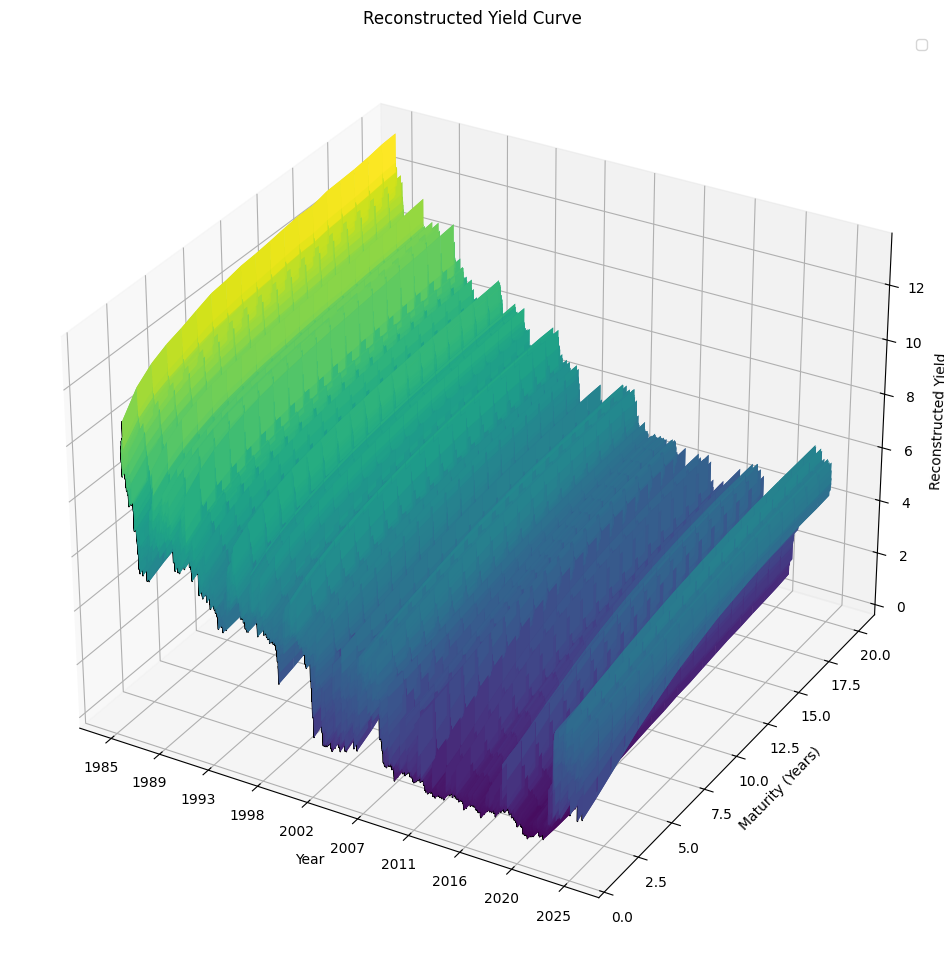

In [49]:
import matplotlib.dates as mdates

dates = data_clean.index  

if 'Date' in data_clean.columns:
    dates = pd.to_datetime(data_clean['Date'])
else:
    dates = pd.to_datetime(data2.loc[data_clean.index, 'Date'])

maturity_cols = [col for col in reconstructed_df.columns if col.isdigit()]
maturity_cols_sorted = sorted(maturity_cols, key=int)

X_time = np.array(dates)
Y_maturities = np.array([int(col) for col in maturity_cols_sorted])
Z_yields = reconstructed_df[maturity_cols_sorted].values

X_mesh, Y_mesh = np.meshgrid(np.arange(len(X_time)), Y_maturities, indexing='ij')

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X_mesh, Y_mesh, Z_yields, cmap='viridis',rstride=1, cstride=1)

first_maturity_idx = 0
ax.plot(np.arange(len(X_time)), 
        np.full(len(X_time), Y_maturities[first_maturity_idx]), 
        Z_yields[:, first_maturity_idx], 
        color='black', linewidth=1)

ax.set_ylabel('Maturity (Years)')
ax.set_zlabel('Reconstructed Yield')
ax.set_title('Reconstructed Yield Curve')

dates_pd = pd.to_datetime(X_time)

ax.set_xticks(np.linspace(0, len(X_time)-1, 10, dtype=int))
ax.set_xticklabels([str(dates_pd[i].year) for i in ax.get_xticks()])

ax.set_xlabel('Year')

ax.legend()

plt.tight_layout()
plt.show()

## Result of VAE

### Laten space

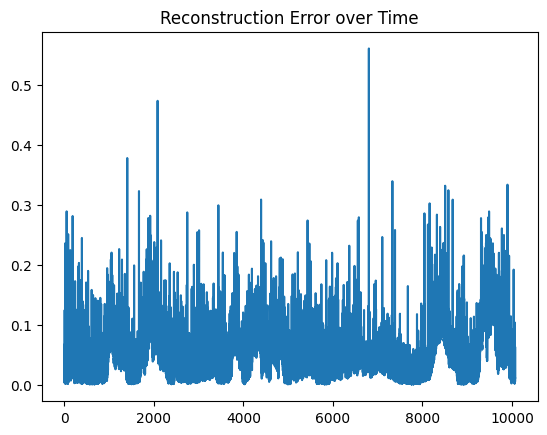

In [50]:
recon_error = np.mean((X_scaled - X_reconstructed)**2, axis=1)
plt.plot(recon_error)
plt.title("Reconstruction Error over Time")
plt.show()


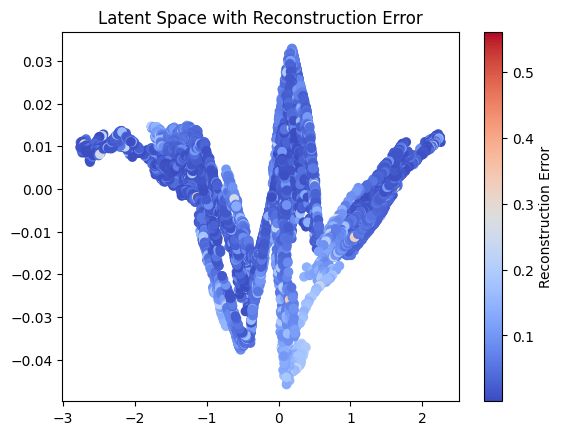

In [52]:
with torch.no_grad():
    mu, _ = model_vae.encode(X_tensor.to(device))
    mu = mu.cpu().numpy()

plt.scatter(mu[:, 0], mu[:, 1], c=recon_error, cmap='coolwarm')
plt.colorbar(label='Reconstruction Error')
plt.title('Latent Space with Reconstruction Error')
plt.show()


### Anomaly detection

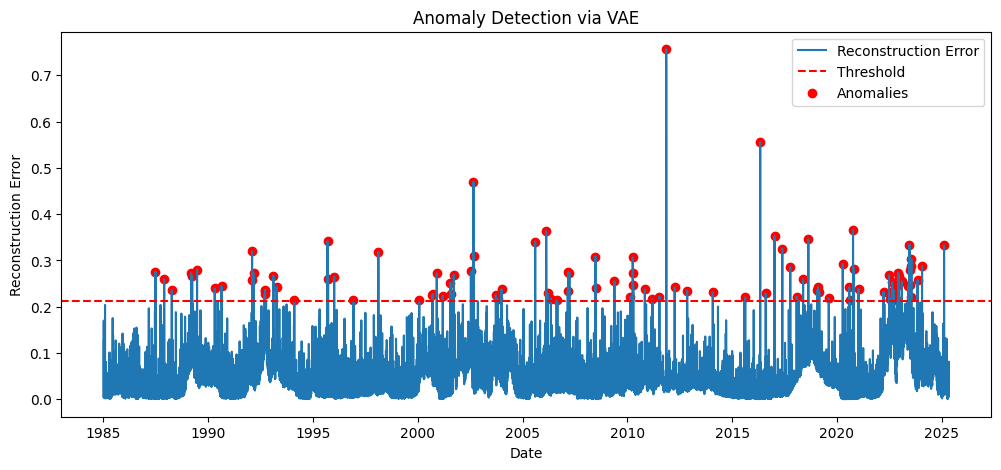

In [57]:
with torch.no_grad():
    x_tensor_device = X_tensor.to(device)
    x_hat, _, _ = model_vae(x_tensor_device)
    reconstruction_errors = torch.mean((x_tensor_device - x_hat) ** 2, dim=1).cpu().numpy()


threshold = np.percentile(reconstruction_errors, 99)
anomalies = reconstruction_errors > threshold

result_df = data_clean.reset_index(drop=True).copy()
result_df["Date"] = pd.to_datetime(data2.loc[data_clean.index, 'Date'].values)
result_df["reconstruction_error"] = reconstruction_errors
result_df["anomaly"] = anomalies


plt.figure(figsize=(12, 5))
plt.plot(result_df["Date"], result_df["reconstruction_error"], label="Reconstruction Error")
plt.axhline(threshold, color='red', linestyle='--', label="Threshold")
plt.scatter(result_df["Date"][result_df["anomaly"]],
            result_df["reconstruction_error"][result_df["anomaly"]],
            color='red', label="Anomalies")
plt.legend()
plt.title("Anomaly Detection via VAE")
plt.xlabel("Date")
plt.ylabel("Reconstruction Error")
plt.show()


In [58]:
anomaly_dates = result_df[result_df["anomaly"]]["Date"]
print(anomaly_dates)

anomaly_dates.shape

619     1987-06-26
723     1987-11-25
811     1988-04-05
1043    1989-03-09
1054    1989-03-27
           ...    
9617    2023-07-14
9623    2023-07-24
9698    2023-11-08
9750    2024-01-25
10012   2025-02-12
Name: Date, Length: 101, dtype: datetime64[ns]


(101,)

In [59]:
fed_df = pd.read_csv("FED_interest.csv", parse_dates=["Date"])

# Filtrér rækker hvor der faktisk er en ændring i renten
fed_change_dates = fed_df[fed_df["Rate Change (bps)"] != 0]["Date"]


anomaly_dates = result_df[result_df["anomaly"]]["Date"]

overlap_dates = pd.Series(list(set(anomaly_dates) & set(fed_change_dates)))
print(f"Number of overlapping dates: {len(overlap_dates)}")
print("Overlapping dates:\n", overlap_dates.sort_values())

Number of overlapping dates: 93
Overlapping dates:
 54   1992-02-04
33   1992-02-07
60   1992-03-04
32   1992-09-09
44   1992-09-16
        ...    
42   2023-07-14
53   2023-07-24
83   2023-11-08
56   2024-01-25
40   2025-02-12
Length: 93, dtype: datetime64[ns]


93 dates overlapping out of 101 anomalies detected. 96 dates with rates changes in FED_interest.csv